In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset: Magic Gamma Telescope
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

### Read CSV

#### Problem: We realize there is no column names in the given dataset, let us go to the dataset to extract the column names and label them ourselves

In [2]:
pd.read_csv("magic-gamma-telescope/magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


#### Solution: We will take the following value from the website to apply as column headers

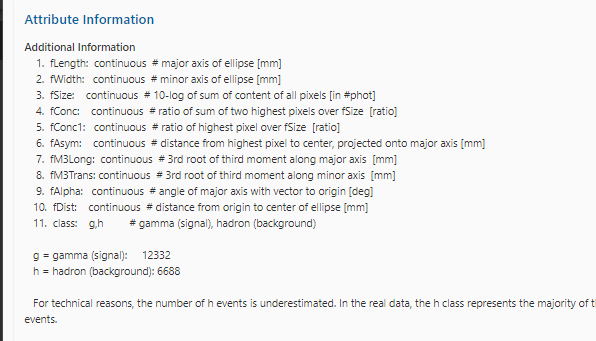

In [3]:
# typing out all the columns header name
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# applying the column headers using 'names' attribute
# store output to df (dataframe, basically rows + columns)
df = pd.read_csv("magic-gamma-telescope/magic04.data", names=cols)
# show first five lines
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
# .unique() returns the unique value in a Pandas series (i.e. a given column) - [1, 2, 2, 3, 5] will return [1,2,3,5]
# the output is either 'g' or 'h', which stands for Gamma or Hadron
df["class"].unique()

array(['g', 'h'], dtype=object)

#### Problem + Solution - Computer don't understand letters, so we need to convert letters to numbers (i.e. convert 'g' to 0 and 'h' to 1)

In [5]:
# panda series (column) representing all the "class" label
df['class']

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

In [6]:
# the first part df['class'] == 'g' checks if the value is equal to g, if it is, boolean is true and thus will return 1
# else it will return as 0, so all 'g' are turned into 1 and all 'h' are turned into 0. #bigbrain.
df['class'] = (df['class'] == 'g').astype(int)

### Classification
- Given a list of all the **features** below, predict the **label**
(P.S. `features` are the values you use to predict the `target variable`/`label`, i.e. fLength, fWidth, etc. are used to predict the label, the `class` column)

In [7]:
# our classes are now 0 and 1 ('g' is 1 and 'h' is 0)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [8]:
# df['class'] returns a series, i.e. index + value like 0 1, 1 1, etc.
# when you use df['class'] == 1, you get a Series of true/false statements
boolean_series = df['class'] == 1
boolean_series

0         True
1         True
2         True
3         True
4         True
         ...  
19015    False
19016    False
19017    False
19018    False
19019    False
Name: class, Length: 19020, dtype: bool

In [9]:
# if you use the Series of true/false, you can find all the dataframe associated with this true value
only_true_dataframe = df[boolean_series]

In [10]:
# then we can get the column name for these classes
# i.e. get the fLength
only_true_dataframe['fLength']

0         28.7967
1         31.6036
2        162.0520
3         23.8172
4         75.1362
           ...   
12327     12.8703
12328     26.8595
12329     22.0913
12330     56.2216
12331     31.5125
Name: fLength, Length: 12332, dtype: float64

#### Problem + Solution - We have limited knowledge of our dataset, let us visualize it better

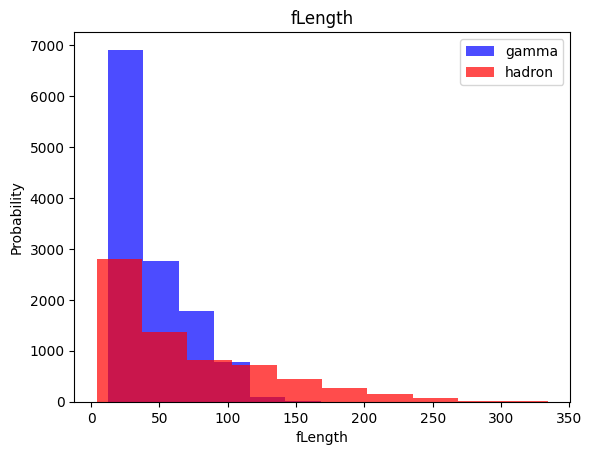

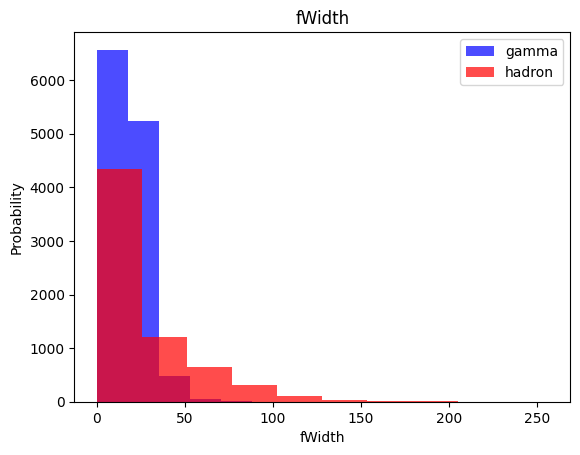

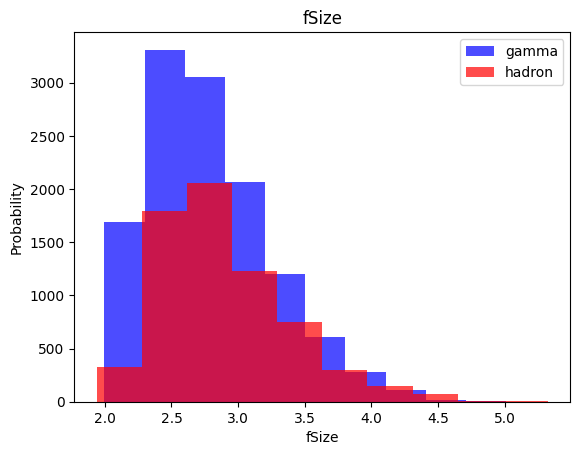

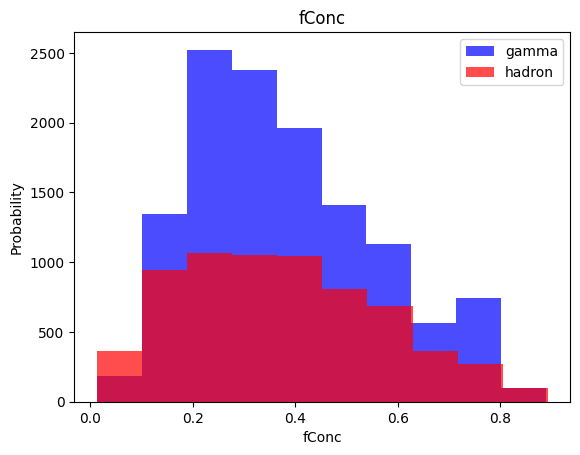

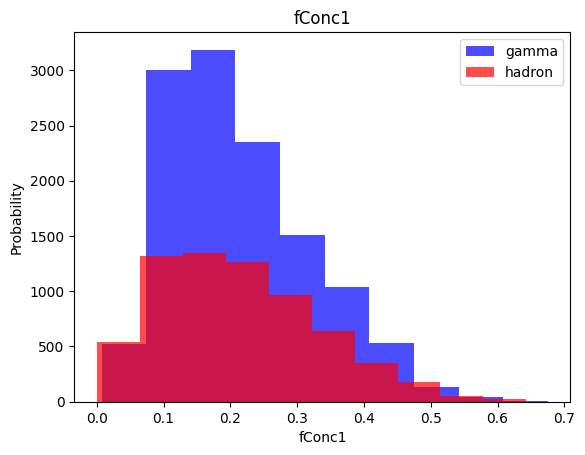

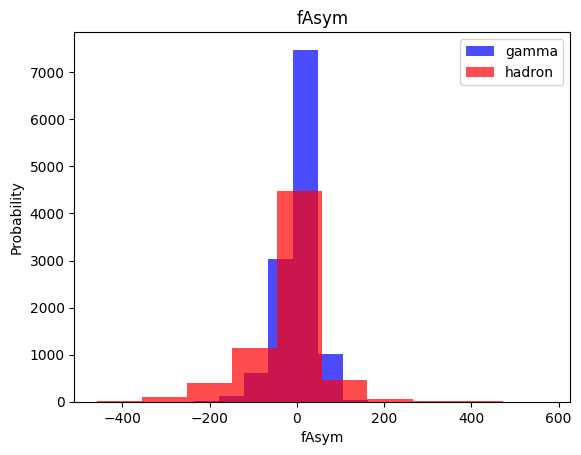

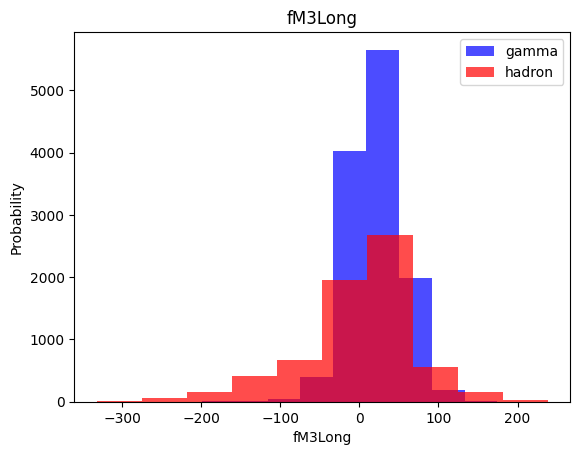

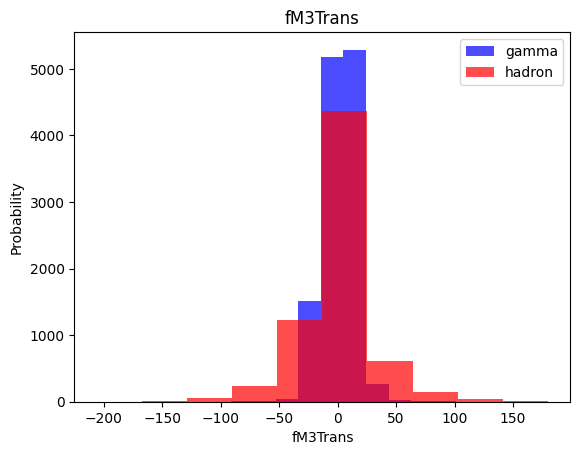

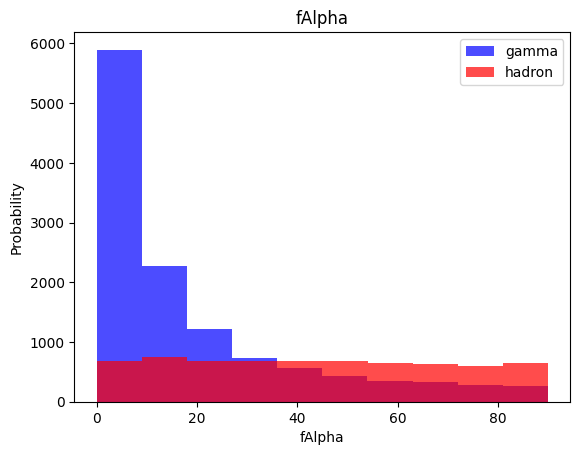

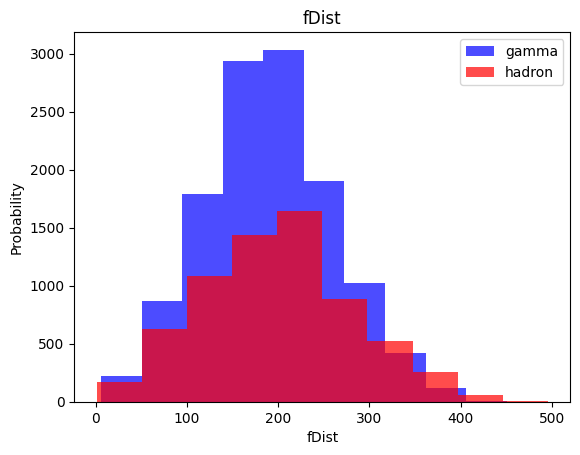

In [11]:
# What we're fundamentally doing here is to plot a histogram to differentiate between gamma and hadron (i.e. class = 1 or class = 0). For each property, we can see which property is more likely to account for whiether something is gamma or hadron
# Now, we'll grab all col headers except last header (the last header is the class)
for col_header in cols[:-1]:
    # color and alpha is merely for aesthetic representation of the graph
    plt.hist(df[df['class']==1][col_header], color='blue', label='gamma', alpha=0.7)
    plt.hist(df[df['class']==0][col_header], color='red', label='hadron', alpha=0.7)
    plt.title(col_header)
    plt.ylabel('Probability')
    plt.xlabel(col_header)
    # this will just show the legends
    plt.legend()
    plt.show() # plot the diagram

# conclusion that you could potentailly draw is
# 1. if the length is smaller, it'll likely be gamma
# 2. if the size is  higher than 2000, it is likely gamma, etc.

# train, validation, and test dataset

In [12]:
# Return a random sample of one row
print(df.sample())
# this means you're getting the entire sample, frac stands for fraction, 0.5 means you're getting half the data.
# also, if you use df.sample(frac=1), you're essentially shuffling the data because you still get back 100% of ur data.
df.sample(frac=0.5)

       fLength  fWidth   fSize  fConc  fConc1    fAsym  fM3Long  fM3Trans  \
12703  16.8677  8.8821  2.4054  0.589  0.3472  32.1945  21.9606   -0.0666   

       fAlpha     fDist  class  
12703  62.694  112.6928      0  


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
241,100.2260,28.2220,3.3769,0.2179,0.1321,-42.0608,-33.4996,-13.6411,4.4376,299.4500,1
12593,140.2162,41.3453,3.2530,0.1686,0.1083,186.5148,-103.8037,-39.7902,86.0878,290.2365,0
16315,51.5075,21.1262,2.8742,0.2781,0.1644,62.3685,-7.4534,9.7978,31.9622,37.9488,0
18995,67.7139,28.5831,3.2384,0.2050,0.1106,-133.6450,63.1391,-16.6379,47.9790,251.9930,0
9646,33.4169,18.0260,2.8882,0.2652,0.1378,-35.9719,14.7763,-9.0004,15.8210,157.3060,1
...,...,...,...,...,...,...,...,...,...,...,...
10863,18.8845,14.3126,2.4370,0.5667,0.3199,19.2517,18.3680,-3.8031,41.7710,70.2066,1
1182,52.2264,23.3743,3.2333,0.1905,0.0956,46.3585,38.1630,7.9243,0.7950,226.3590,1
3389,23.2199,12.5471,2.4306,0.5195,0.3061,25.9603,11.3088,8.5799,2.3661,207.8860,1
18602,68.7977,31.4546,3.1931,0.1686,0.0862,-22.9900,-57.4470,26.4655,37.0270,96.5962,0


In [13]:
import numpy as np

# Create a sample array
arr = np.array([1, 2, 3, 4, 5, 6])

# Split the array into 3 equal parts, giving u 3 arrays - first one is [1,2], second one [3,4], third one is [5,6]
sub_arrays = np.split(arr, 3)
print(sub_arrays)

[array([1, 2]), array([3, 4]), array([5, 6])]


In [14]:
# this essentially give you a number representing the index of the last item at first 60% of the data, i.e. if you have 100 rows, the number returned will be 60 - we're then casting it to integer
first_60 = int(0.6*len(df))
first_80 = int(0.8*len(df))
print(first_60)


# tldr; this split it such that first 60% of your dataset is train dataset, between 60 and 80% is your validation, and the last 20% from 80-100 is your test dataset
train, valid, test = np.split(df.sample(frac=1), [first_60, first_80])

11412


#### Problem: The scale of different columns may be inconsistent with the scale of other columns
- i.e. a column `fLength` may go up to 100++ while `fConc` has value such as 0.01, 0.03, etc.
- This inconsistency may affect algorithm's performance

In [15]:
# returns all the values in the dataframe, i.e. array([[ 28.7967,  16.0021,   2.6449, ...,  40.092 ,  81.8828,   1.    ],
       # [ 31.6036,  11.7235,   2.5185, ...,   6.3609, 205.261 ,   1.    ], ...
# the .values return numpy array
df.values

# returns all the columns value, i.e. Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', ... ,'class'], dtype='object')
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

#### Solution: we will do feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [17]:
# the TLDR; of what this is trying to do is to
# 1. do feature scaling (in order to make sure ML model is more accurate)
# 2. after you do feature scaling, you need to combine back the result with the class (label) column, to do that, we will need to use np.hstack and reszie the shape of the label np array
# see https://chat.openai.com/c/d147b53b-dd8c-4ace-a350-76ab38700f8f and https://chat.openai.com/c/b63c2821-4232-4d4b-9f0b-8e4f3c8d60b4 and https://chat.openai.com/c/1dbd615a-3eb8-4f2f-9176-4d36d6953255
def scale_dataset(df, oversample=False):
    # tldr; this will trim the last column (i.e. 'class') and just take the values of all other columns
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    # you can fit and transform x
    scaler = StandardScaler()
    # tldr; this scale the values for each of your features, i.e. 1000,2000 kinda data may become 1.2, 1.4, etc.
    x = scaler.fit_transform(x)

    # we have a lot of "gamma" data but few "hadron" data; we can use RandomOverSampler and fit_sample which essentially just duplicate the samples; i.e. generate new samples by randomly sampling with repalcement
    # good to know that this could introduce problem of overfitting.
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)

    data = np.hstack( (x, np. reshape (y, (-1, 1))))
    return data, x, y

In [18]:
# see your training dataset
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
8156,19.6428,15.4887,2.4241,0.4746,0.2768,-4.9703,17.0838,8.1319,51.0691,252.6730,1
5321,63.8088,18.3460,2.9180,0.3092,0.1552,43.7516,65.9962,-8.3016,8.9660,225.8190,1
13110,69.8391,33.2876,2.7741,0.3329,0.1968,62.0212,41.4977,15.1292,8.1046,96.6540,0
11371,17.3878,10.8932,2.2967,0.5960,0.3510,1.2155,-6.0171,6.8011,2.3939,79.0246,1
15686,21.1741,15.6793,2.2735,0.5951,0.2942,36.1070,-2.3961,-5.9800,50.3440,203.7493,0
...,...,...,...,...,...,...,...,...,...,...,...
9743,40.4803,15.8483,2.8457,0.3680,0.1947,-28.5884,-11.7925,5.9756,0.8290,205.7210,1
18650,83.9807,50.6852,3.5779,0.2196,0.1503,-5.3041,89.3562,-23.2253,59.7327,316.8720,0
8226,31.8879,16.6510,2.6091,0.3100,0.1587,25.2696,17.5417,-16.3070,31.3209,68.3407,1
12315,24.1407,10.3973,2.4241,0.5687,0.3446,-15.1117,-19.6333,8.6287,2.5410,180.9030,1


#### Problem: There are way more 'gamma' dataset than 'hadron' dataset

In [19]:
# you realize there are 7427 rows here for 'gamma'
train[train['class']==1] # gamma

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
8156,19.6428,15.4887,2.4241,0.4746,0.2768,-4.9703,17.0838,8.1319,51.0691,252.6730,1
5321,63.8088,18.3460,2.9180,0.3092,0.1552,43.7516,65.9962,-8.3016,8.9660,225.8190,1
11371,17.3878,10.8932,2.2967,0.5960,0.3510,1.2155,-6.0171,6.8011,2.3939,79.0246,1
1599,70.8315,22.3982,3.3197,0.2227,0.1252,81.8166,69.0231,19.2635,10.3850,248.9830,1
8383,37.5265,21.7254,3.0988,0.2087,0.1087,37.1436,8.3872,8.8451,7.3742,141.9140,1
...,...,...,...,...,...,...,...,...,...,...,...
3905,12.8630,11.4190,2.0434,0.7330,0.4027,15.1002,-7.4255,10.8121,17.0310,223.3660,1
9743,40.4803,15.8483,2.8457,0.3680,0.1947,-28.5884,-11.7925,5.9756,0.8290,205.7210,1
8226,31.8879,16.6510,2.6091,0.3100,0.1587,25.2696,17.5417,-16.3070,31.3209,68.3407,1
12315,24.1407,10.3973,2.4241,0.5687,0.3446,-15.1117,-19.6333,8.6287,2.5410,180.9030,1


In [20]:
# you realize there are 3985 rows here for 'gamma'
train[train['class']==0] # hadron

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
13110,69.8391,33.2876,2.7741,0.3329,0.1968,62.0212,41.4977,15.1292,8.1046,96.6540,0
15686,21.1741,15.6793,2.2735,0.5951,0.2942,36.1070,-2.3961,-5.9800,50.3440,203.7493,0
18985,91.6622,35.3177,2.6779,0.2960,0.1195,48.2459,80.4140,9.2752,27.0291,243.3712,0
15754,29.3655,10.6451,2.4775,0.5091,0.2898,-11.4265,27.2228,-6.9228,46.1961,105.0983,0
17379,20.8891,10.5710,2.6004,0.6600,0.3802,22.5836,14.7551,10.8077,38.2410,197.9070,0
...,...,...,...,...,...,...,...,...,...,...,...
14964,107.5470,21.5764,2.8448,0.3188,0.1694,51.8313,38.5643,14.6639,12.9259,114.5170,0
12457,40.4736,27.3480,2.7645,0.3972,0.2107,37.2395,34.0363,17.0206,32.3135,151.6490,0
14534,61.1176,5.1427,2.8755,0.3903,0.2099,59.0778,24.1920,2.7014,62.0811,109.4584,0
13594,19.9786,9.2008,2.4346,0.6507,0.4283,-4.1789,14.4521,10.3094,78.2768,32.3245,0


#### Solution: We can 'oversample' our hadron dataset to make sure the data are more balanced
- `from imblearn.over_sampling import RandomOverSampler`
- Solution implemented in `scale_dataset` algo above.

In [21]:
# you want to oversample your train dataset
train, x_train, y_train = scale_dataset(train, oversample=True)

# but not for your test dataset; your test dataset should be unseen and clean.
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)



In [22]:
# 14748
len(y_train)

14736

In [23]:
# after we scale dataset and autobalanced, we have the same value for both classes
sum(y_train == 1)

7368

In [24]:
sum(y_train == 0)

7368

# K-Nearest Neighbors (KNN) Implementation

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred = knn_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# y_test is your actual class value/label
# y_pred is achieved above with the knn_model; so we are comparing the prediction with the true value
# for precision, recall, and f1 score, look at your notion db.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1330
           1       0.83      0.89      0.86      2474

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [29]:
# retrain with different number of neighbors (k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1330
           1       0.85      0.85      0.85      2474

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [30]:
# retrain with different number of neighbors (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1330
           1       0.86      0.86      0.86      2474

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes Implementation

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [33]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.52      1330
           1       0.74      0.88      0.81      2474

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.71      3804



#### Naive bayes underperformed compared to KNN Algorithm

![Alt text](image-1.png)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [36]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1330
           1       0.85      0.82      0.84      2474

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machine

In [37]:
from sklearn.svm import SVC

In [38]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [39]:
y_pred = svm_model.predict(x_test)
# SVM gave us the best results so far
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1330
           1       0.89      0.89      0.89      2474

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [40]:
import tensorflow as tf